# Examen Parcial n°1 2da Parte - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).


### Criterios de Evaluación:

1. No esta permitido el uso de IAs durante el examen. (Desactivar Copilot o cualquier herramienta de IA para autocompletar codigo.)

2. Se deben utilizar nombres de variables descriptivos y claros (Utilizar la nomeclatura correspondiente para los nombres de variables).

3. Comentarios claros y concisos que expliquen el propósito de cada sección del código en una celda de markdown antes del código.

4. Utilizar mensajes de commit descriptivos. (Puedes utilizar la extension CONVENTIONAL COMMIT de VS-CODE).

5. Entrega en tiempo y forma (Parciales entregados fuera de hora o con commits pasados el horario de entrega quedará invalidado.)

6. Todo el código desarrollado debe ser subido a un repositorio en GitHub (el nombre del repositorio de seguir la siguiente estructura: 
**parcial1_tlp3_nombre_apellido**).

7. Para resolver las actividades se debe insertar casillas de codigo entre cada actividad del cuaderno de Jupyter.

8. Deben trabajar con el datasets adjunto.

9. Una vez finalizado el examen, los resultados deben quedar guardados debajo de cada celda (NO EJECUTAR LA OPCIÓN "borrar todas las salidas").

**Importante:** Una vez finalizado el examen, marcar como completado en el classroom.

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de VOTACIONES en un Datasets.


### Comentario del desarrollador
* En la siguiente seccion se realizara la importacion de pandas (pd) y matplotlib (plt) y se cargara el archivo CSV(votaciones.csv)

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("votaciones.csv")


### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. 
- 2.1: Visualizar las primeras filas y ultimas.
- 2.2: Obtener informacion del df con su metodo correspondiente.
- 2.3: Hacer un conteo de valores nulos.

### Comentarios del desarrollador
### Para mostrar las primeras y ultimas filas se utilizara "head()" y "tail()"

In [185]:
print("Primeras 5 filas del archivo")
print(df.head())
print(50*"-")

print("Ultimas 5 filas")
print(df.tail())

Primeras 5 filas del archivo
    nombre apellido         dni     provincia  voto fecha_votacion
0  pánfilo    pombo  34787190.0  buenos aires  nulo     2024-11-22
1   albina  heredia  48336819.0      santa fe  nulo     2024-04-24
2      NaN   solano  49179364.0       neuquen  nulo     2024-05-20
3   salomé   barrio  43725639.0  buenos aires   NaN     05-06-2024
4   matías  esteban  30599927.0         chaco    no     10-07-2023
--------------------------------------------------
Ultimas 5 filas
       nombre apellido         dni provincia  voto fecha_votacion
96      carla    vidal  15161718.0  misiones  nulo     2023-09-12
97   federico  barrios  16171819.0   neuquen    no     11-09-2023
98      belen     vera  17181920.0   tucuman    sí     2023-09-10
99    gustavo    gauna  18192021.0  santa fe  nulo     09-09-2023
100     rocio    avila  19202122.0   formosa    no     08-09-2023


### La informacion del DataFrame se realizara utilizando el metodo "info()"

In [186]:
print("Informacion del DataFrame")
print(df.info())

Informacion del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre          91 non-null     object 
 1   apellido        94 non-null     object 
 2   dni             90 non-null     float64
 3   provincia       95 non-null     object 
 4   voto            96 non-null     object 
 5   fecha_votacion  95 non-null     object 
dtypes: float64(1), object(5)
memory usage: 4.9+ KB
None


### Y los valores nulos se mostrara mediante el "isnull()" y se hara un conteo de cuantos existen agregandole ".sum()"

In [187]:
print("Valores nulos")
print(df.isnull().sum())

Valores nulos
nombre            10
apellido           7
dni               11
provincia          6
voto               5
fecha_votacion     6
dtype: int64



### 3. Limpieza y Normalización de los Datos

- 3.1. Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes (Deben aplicar los metodos que ustedes crean convenientes **(Solo 1)**, por ejemplo: Eliminación de filas, cubrir valores con media, mediana, etc.)
- 3.2: La columna Fecha deberan pasarla al tipo datetime con su metodo correspondiente.
- 3.3: Corregir las mayusculas en el caso de Nombre y Apellido (Si es que corresponde.)
- 3.4: En el caso de los votos, aplicar mayusculas a cada fila.
- 3.5 EL campo DNI debe ser del tipo INT.

### Comentarios del desarrollador
### Para normalizar los datos de tiempo se utilizara las Series para agrupar la fecha_votacion y luego el metodo to_datatime para cambiarlo

In [188]:
serie_fecha = pd.Series(df["fecha_votacion"])
serie_fecha

serie_fecha1 = pd.to_datetime(serie_fecha, format="%Y-%m-%d", errors="coerce")
serie_fecha2 = pd.to_datetime(serie_fecha, format="%d-%m-%Y", errors="coerce")

serie_fecha_final = serie_fecha1.combine_first(serie_fecha2)
serie_fecha_final

0     2024-11-22
1     2024-04-24
2     2024-05-20
3     2024-06-05
4     2023-07-10
         ...    
96    2023-09-12
97    2023-09-11
98    2023-09-10
99    2023-09-09
100   2023-09-08
Name: fecha_votacion, Length: 101, dtype: datetime64[ns]

In [189]:
df["fecha_votacion"] = serie_fecha_final
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   nombre          91 non-null     object        
 1   apellido        94 non-null     object        
 2   dni             90 non-null     float64       
 3   provincia       95 non-null     object        
 4   voto            96 non-null     object        
 5   fecha_votacion  95 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 4.9+ KB


### Para normalizar los nombres y apellidos se utilizara el metodo "str.tittle()" para las mayusculas y "str.strip()" para los espacios


In [190]:
df["nombre"] = df["nombre"].str.title().str.strip()
df["apellido"] = df["apellido"].str.title().str.strip()
df.head(10)

,nombre,apellido,dni,provincia,voto,fecha_votacion
0,Pánfilo,Pombo,34787190.0,buenos aires,nulo,2024-11-22
1,Albina,Heredia,48336819.0,santa fe,nulo,2024-04-24
2,NaN,Solano,49179364.0,neuquen,nulo,2024-05-20
3,Salomé,Barrio,43725639.0,buenos aires,NaN,2024-06-05
4,Matías,Esteban,30599927.0,chaco,no,2023-07-10
5,NaN,Sosa,17014535.0,santa fe,sí,2024-11-02
6,Gervasio,Bou,33761658.0,mendoza,no,2023-09-23
7,Brígida,Angulo,22169546.0,chaco,no,2024-05-02
8,Glauco,Fabra,NaN,cordoba,sí,2023-06-07
9,Trinidad,Company,12192872.0,neuquen,nulo,2024-10-30


### Para normalizar el voto se utilizara el metodo "str.upper()" para que se pasen a mayuscula


In [191]:
df["voto"] = df["voto"].str.upper()
df.head()

,nombre,apellido,dni,provincia,voto,fecha_votacion
0,Pánfilo,Pombo,34787190.0,buenos aires,NULO,2024-11-22
1,Albina,Heredia,48336819.0,santa fe,NULO,2024-04-24
2,NaN,Solano,49179364.0,neuquen,NULO,2024-05-20
3,Salomé,Barrio,43725639.0,buenos aires,NaN,2024-06-05
4,Matías,Esteban,30599927.0,chaco,NO,2023-07-10


### Para normalizar el dni se utilizara el metodo "astype("int64")" para pasarlo a entero


In [192]:
df["dni"] = df["dni"].astype("Int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   nombre          91 non-null     object        
 1   apellido        94 non-null     object        
 2   dni             90 non-null     Int64         
 3   provincia       95 non-null     object        
 4   voto            96 non-null     object        
 5   fecha_votacion  95 non-null     datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), object(4)
memory usage: 5.0+ KB



### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben hacer lo siguiente: 

- 4.1: calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos.
- 4.2: Calcular estadísticas específicas por grupo (Agrupar dos columnas).

### Comentario del desarrollador
### Para ver la estadistica descriptiva se utilizara el metodo ".describe()" y ".round(2)" para redondear el resultado

In [193]:
df.describe().round(2)

,dni,fecha_votacion
count,90.0,95
mean,38649101.38,2024-01-15 20:27:47.368421120
min,10111213.0,2023-05-13 00:00:00
25%,19821665.25,2023-09-24 00:00:00
50%,33193093.0,2023-10-09 00:00:00
75%,48867378.0,2024-05-03 12:00:00
max,99001122.0,2025-04-26 00:00:00
std,24001977.99,NaN



### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear **UNA** visualización que permitan comprender mejor los datos de ventas.El grafico es a elección, puede crear **UNO** de los siguientes: histogramas, diagramas de dispersión, gráficos de barras y graficos de torta.

### Comentario del desarrollador
* Para realizar el grafico se agrupara las provincias y votos mediante el groupby
* Con el metodo "size()" se contara la cantidad de filas hay por grupo
* Con el metodo ".unstack()" se convertiran los tipos de votos en columnas
* Con el metodo "fill_value = 0" se rellenara con 0 donde no hubo votos de un tipo
* El grafico que se realizara es el de barras, porque lo considero optimo para mostrar estos 2 tipos de datos.

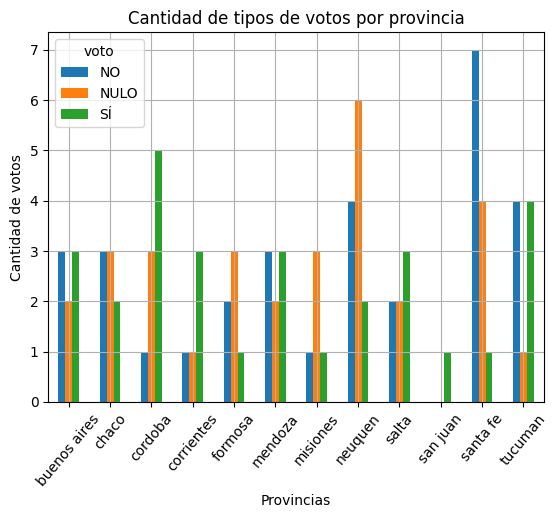

In [194]:
conteo = df.groupby(["provincia","voto"]).size().unstack(fill_value=0)

conteo.plot(kind="bar")

plt.title("Cantidad de tipos de votos por provincia")
plt.xlabel("Provincias")
plt.ylabel("Cantidad de votos")
plt.xticks(rotation=50)
plt.grid()
plt.show()


### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Deben hacer una conexión y hacer una consulta para ver si los datos fueron cargados correctamente.

### Comentarios del desarrollador
* Para exportar el archivo a SQLite se creara la conn (el cual creara el archivo donde quiero enviarlo)
* mediante "df.to_sql" se convertira el archivo CSV a SQL

In [196]:
import sqlite3
conn = sqlite3.connect("votaciones.sqlite")
df.to_sql("resultadoVotaciones", conn, if_exists="replace",index=False)
conn.close()

In [201]:
conexion = sqlite3.connect("votaciones.sqlite")

df_nuevo = pd.read_sql_query("SELECT * FROM resultadoVotaciones", conexion)
df_nuevo

,nombre,apellido,dni,provincia,voto,fecha_votacion
0,Pánfilo,Pombo,34787190.0,buenos aires,NULO,2024-11-22 00:00:00
1,Albina,Heredia,48336819.0,santa fe,NULO,2024-04-24 00:00:00
2,None,Solano,49179364.0,neuquen,NULO,2024-05-20 00:00:00
3,Salomé,Barrio,43725639.0,buenos aires,None,2024-06-05 00:00:00
4,Matías,Esteban,30599927.0,chaco,NO,2023-07-10 00:00:00
...,...,...,...,...,...,...
96,Carla,Vidal,15161718.0,misiones,NULO,2023-09-12 00:00:00
97,Federico,Barrios,16171819.0,neuquen,NO,2023-09-11 00:00:00
98,Belen,Vera,17181920.0,tucuman,SÍ,2023-09-10 00:00:00
99,Gustavo,Gauna,18192021.0,santa fe,NULO,2023-09-09 00:00:00
